In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#load dataset
df = pd.read_csv("Africa electricity access.csv")

#view dataset
df.head()

,Country Name,Country Code,IncomeGroup,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,31.58,32.61,33.61,32.63,...,44.05,47.05,47.65,46.76,50.90,48.79,51.21,51.16,51.73,54.22
1,Angola,AGO,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.26,38.40,32.00,42.00,41.79,42.91,45.29,45.63,46.96,48.22
2,Burundi,BDI,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,6.90,7.00,7.89,8.48,9.30,9.51,9.84,9.10,10.23
3,Benin,BEN,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,14.50,...,38.40,34.65,34.10,29.62,37.03,34.50,39.01,40.00,40.99,41.97
4,Burkina Faso,BFA,Low income,NaN,NaN,NaN,6.10,6.13,6.63,7.12,...,15.07,15.39,19.20,16.15,16.57,17.01,14.40,17.60,18.47,18.95


In [5]:
#explore dataset
df.shape

(57, 35)

In [9]:
#explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  57 non-null     object 
 1   Country Code  57 non-null     object 
 2   IncomeGroup   54 non-null     object 
 3   1990          4 non-null      float64
 4   1991          7 non-null      float64
 5   1992          15 non-null     float64
 6   1993          20 non-null     float64
 7   1994          23 non-null     float64
 8   1995          25 non-null     float64
 9   1996          32 non-null     float64
 10  1997          35 non-null     float64
 11  1998          37 non-null     float64
 12  1999          38 non-null     float64
 13  2000          52 non-null     float64
 14  2001          52 non-null     float64
 15  2002          53 non-null     float64
 16  2003          53 non-null     float64
 17  2004          53 non-null     float64
 18  2005          53 non-null     fl

In [12]:
#explore the dataset
df.isnull().sum()

Country Name     0
Country Code     0
IncomeGroup      3
1990            53
1991            50
1992            42
1993            37
1994            34
1995            32
1996            25
1997            22
1998            20
1999            19
2000             5
2001             5
2002             4
2003             4
2004             4
2005             4
2006             4
2007             2
2008             2
2009             2
2010             2
2011             2
2012             2
2013             2
2014             2
2015             2
2016             2
2017             2
2018             2
2019             2
2020             2
2021             2
dtype: int64

In [17]:
#calculate the mean column-wise
mean_electricity_access=df.iloc[:, 4:].mean(axis=0)
mean_electricity_access

1991    31.238571
1992    29.800667
1993    28.744500
1994    32.880870
1995    32.520800
1996    33.349063
1997    31.557143
1998    31.316757
1999    31.926842
2000    33.618846
2001    34.378462
2002    34.464340
2003    35.932453
2004    36.791509
2005    37.002642
2006    39.022830
2007    38.643636
2008    39.033091
2009    39.656364
2010    41.445273
2011    43.119636
2012    43.981091
2013    44.870909
2014    45.995636
2015    46.894182
2016    49.182545
2017    50.113455
2018    52.474000
2019    53.234182
2020    54.418727
2021    55.893455
dtype: float64

In [19]:
#create dataframe with new mean values
new_mean_df=pd.DataFrame(mean_electricity_access, columns=['Electricity Access'])
new_mean_df

,Electricity Access
1991,31.238571
1992,29.800667
1993,28.744500
1994,32.880870
1995,32.520800
1996,33.349063
1997,31.557143
1998,31.316757
1999,31.926842
2000,33.618846


In [21]:
#add a column for years
new_mean_df['Year']=new_mean_df.index.astype(int)
new_mean_df

,Electricity Access,Year
1991,31.238571,1991
1992,29.800667,1992
1993,28.744500,1993
1994,32.880870,1994
1995,32.520800,1995
1996,33.349063,1996
1997,31.557143,1997
1998,31.316757,1998
1999,31.926842,1999
2000,33.618846,2000


In [23]:
#set year column as index
new_mean_df.set_index('Year', inplace=True)
new_mean_df

,Electricity Access
Year,
1991,31.238571
1992,29.800667
1993,28.744500
1994,32.880870
1995,32.520800
1996,33.349063
1997,31.557143
1998,31.316757
1999,31.926842


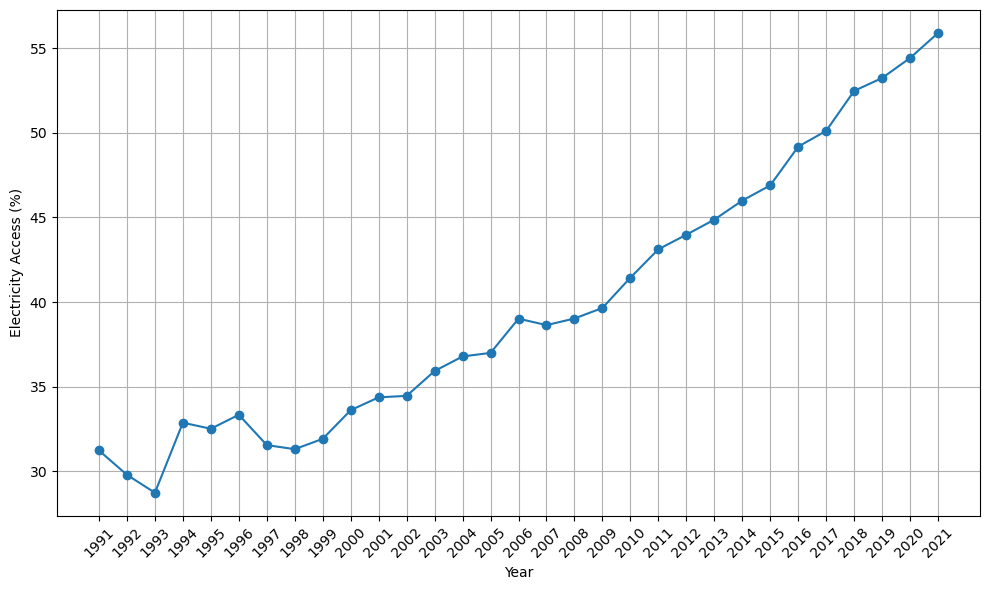

In [29]:
#plot the trend
plt.figure(figsize=(10, 6))
plt.plot(new_mean_df.index, new_mean_df['Electricity Access'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Electricity Access (%)')
plt.grid(True)
plt.xticks(new_mean_df.index, rotation=45)
plt.tight_layout()
plt.show()

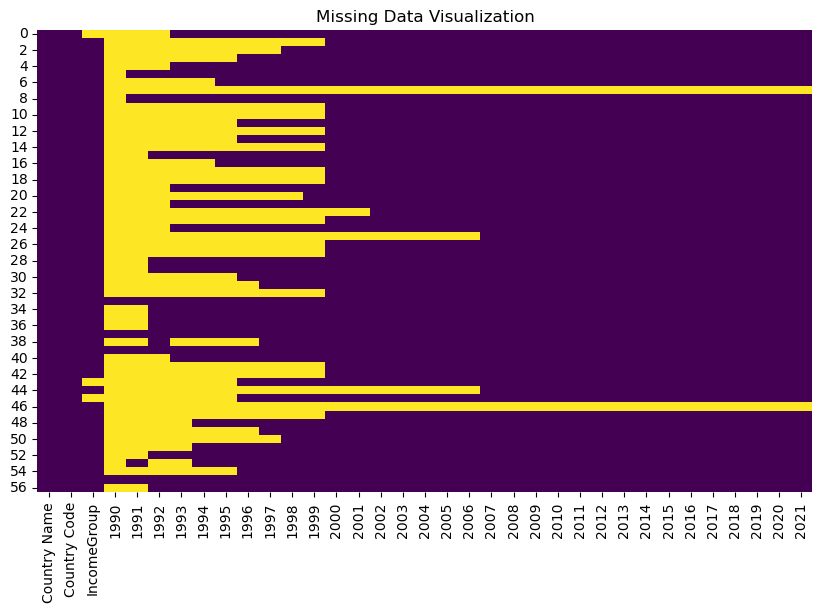

In [33]:
#plotting a heatmap to visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

In [41]:
#calculate the percentage of missing values in each column
missing_percentage=(df.isnull().mean())*100
missing_percentage=round(missing_percentage, 2)
missing_percentage

Country Name     0.00
Country Code     0.00
IncomeGroup      5.26
1990            92.98
1991            87.72
1992            73.68
1993            64.91
1994            59.65
1995            56.14
1996            43.86
1997            38.60
1998            35.09
1999            33.33
2000             8.77
2001             8.77
2002             7.02
2003             7.02
2004             7.02
2005             7.02
2006             7.02
2007             3.51
2008             3.51
2009             3.51
2010             3.51
2011             3.51
2012             3.51
2013             3.51
2014             3.51
2015             3.51
2016             3.51
2017             3.51
2018             3.51
2019             3.51
2020             3.51
2021             3.51
dtype: float64

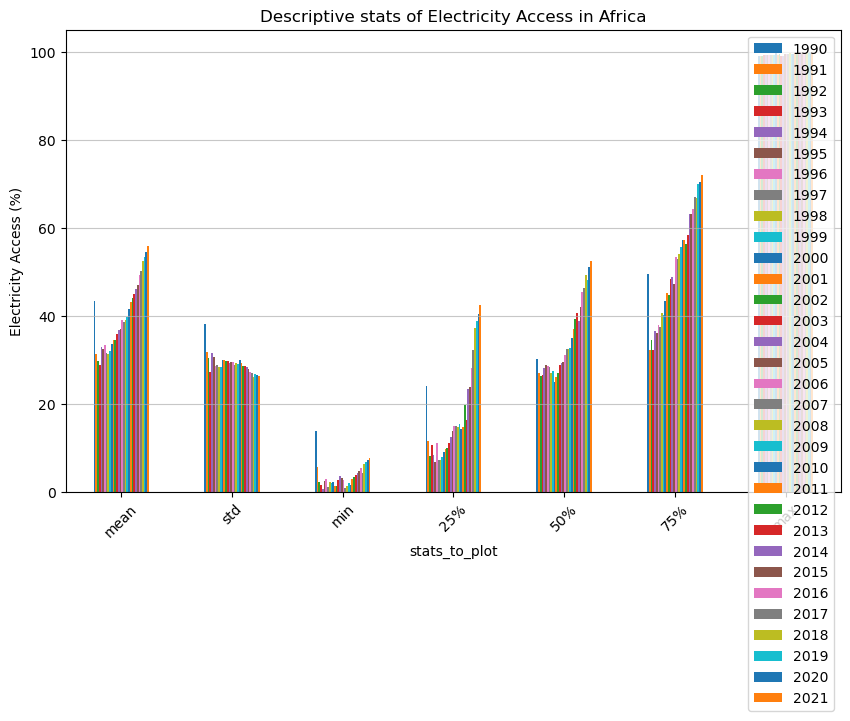

In [47]:
#calculative descriptive statistics summary_stats
summary_stats=df.describe()

#extracting relevant statistics for plotting
stats_to_plot=summary_stats.drop(index=['count'])

#plot the descriptive stats
stats_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Descriptive stats of Electricity Access in Africa')
plt.xlabel('stats_to_plot')
plt.ylabel('Electricity Access (%)')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#using ARIMA
#ASsuming 'Year' is the index
df.index=df.date_range(start='1990', periods-len(df), freq='A')

#FIT ARIMA model
model=ARIMA